# COMP5425 : Implement a simple JPEG encoder (sequential mode) step by step 

This is a toy example to illustrate how to implement a simple JPEG encoder for image compression
- author: Joseph Chen
- email: zuyao.chen@connect.polyu.hk
- date: Feb. 23, 2022

reference materials:
- COMP5425, HK PolyU (lecturer: Prof. Changwen Chen)
- https://en.wikipedia.org/wiki/JPEG
- https://yasoob.me/posts/understanding-and-writing-jpeg-decoder-in-python/#discrete-cosine-transform-quantization
- Digital Video Concepts, Methods, and Metrics: Quality, Compression, Performance, and Power Trade-off Analysis
- https://users.ece.utexas.edu/~ryerraballi/MSB/pdfs/M4L1.pdf
- https://en.wikipedia.org/wiki/Chroma_subsampling#Sampling_systems_and_ratios

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


import sys


# 1. If you install ``jpeg_py'' via ``python setup.py install'' or "make install", comment the following two lines;
# 2. If you just build ``jpeg_py'' without installing, please modify the "JPEG_PY_PATH"
JPEG_PY_PATH = "./build/lib.macosx-10.9-universal2-3.9" # the path -> jpeg_py  
sys.path.append(JPEG_PY_PATH) 

from jpeg_py import read_rgb_image, YUVFormat, JpegIO, HuffmanCodec 

The following picture shows the pipeline of JPEG encoder 
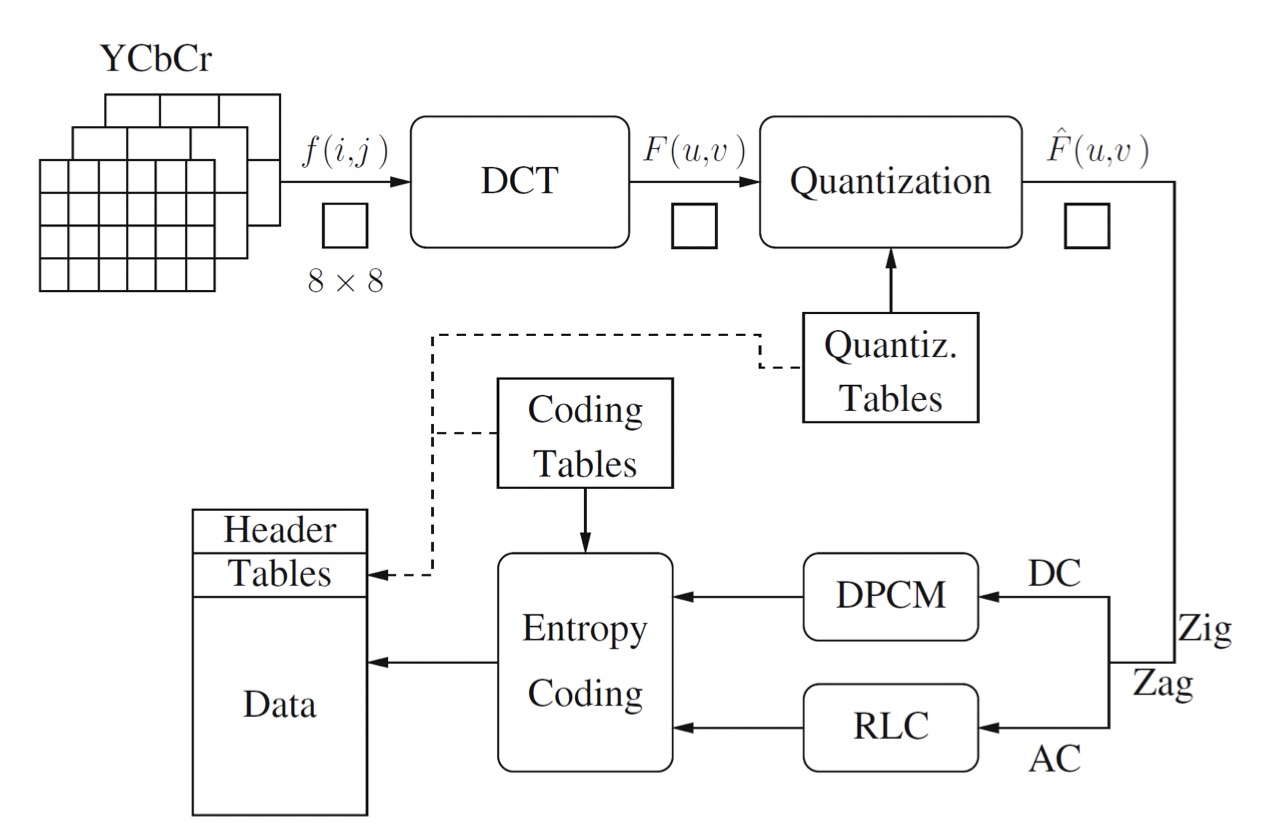

Before compression, the shape of the image : (4000, 6000, 3)  size: 70312.5 kB


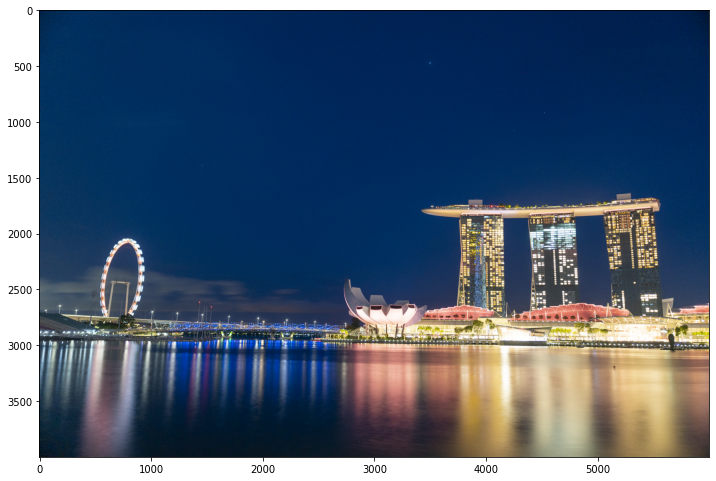

In [2]:
image = read_rgb_image("./data/sg_0.png")
 
H, W, C = image.shape
print("Before compression, the shape of the image :", image.shape, " size:", H*W*C/1024, "kB")

plt.figure(figsize=(12, 12)) 
plt.imshow(image)

# some global vars.
COLOR_FORMAT = YUVFormat.YUV444
# quality range [1, 100]
QUALITY = 50
OUTPUT_NAME = "./data/py_Q_%s.jpg" % QUALITY  # output jpeg file 

# step 0 -- Convert the RGB image into YCbCr and Subsample Chrominance Channels 

RGB -> YCbCr / YUV (8 bit)
=====
        | Y  |     |  0.299       0.587       0.114 |   | R |     | 0 |
        | Cb |  =  |- 0.1687    - 0.3313      0.5   | * | G |   + |128|
        | Cr |     |  0.5       - 0.4187    - 0.0813|   | B |     |128|
        
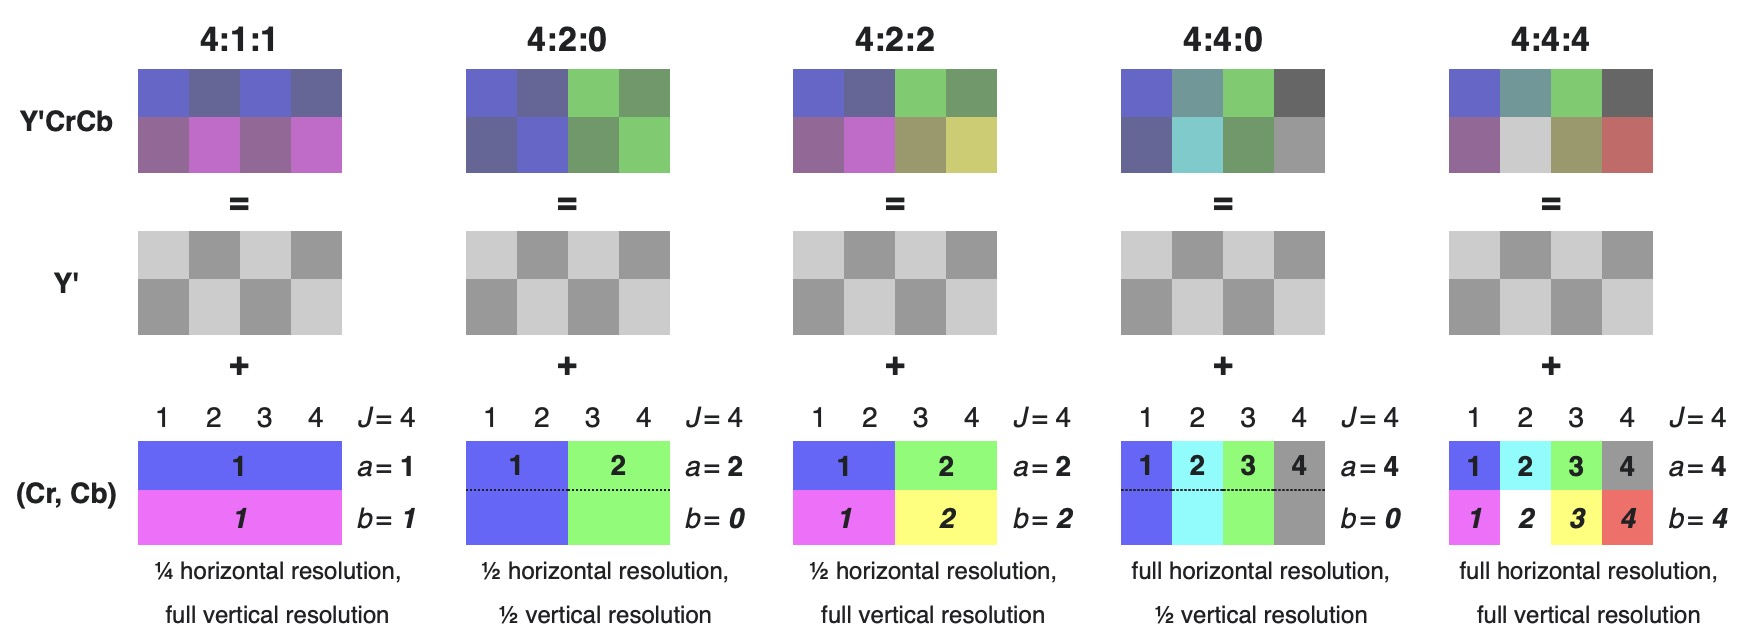

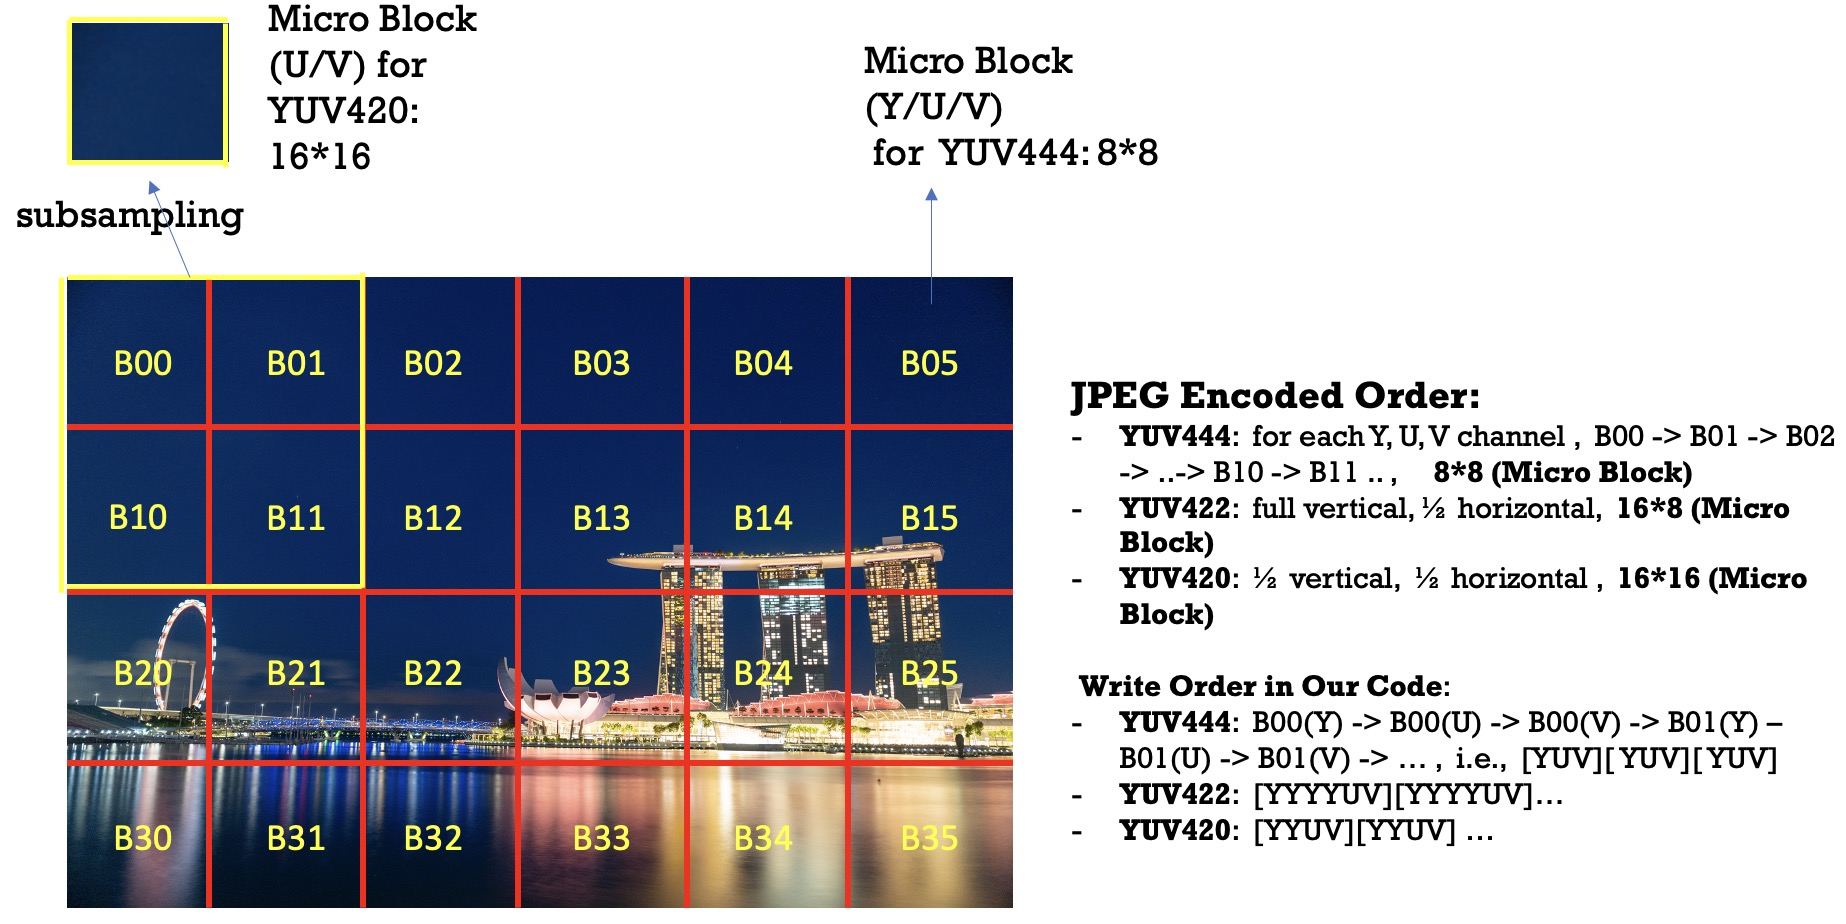

In [1]:
# color convert 
# BGR -> YUV
def rgb_to_yuv(img):
    """
      convert rgb image to yuv format
      @input: img -- H*W*C (C=3) rgb image
      @output: img_yuv -- H*W*C(C=3) yuv image
    """
    raise Exception("TODO: implement rgb to yuv conversion")

    return img_yuv

img_yuv = rgb_to_yuv(image)

# YUV444 
img_sub = [img_yuv[:,:, 0], 
           img_yuv[:, :, 1],
           img_yuv[:, :, 2]]
print("Y:", img_sub[0].shape,
      "U", img_sub[1].shape,
      "V", img_sub[2].shape)

plt.figure(figsize=(16, 8)) 
plt.subplot(131)
plt.imshow(img_sub[0])
plt.title("Y")
plt.subplot(132)
plt.imshow(img_sub[1])
plt.title("U")
plt.subplot(133)
plt.imshow(img_sub[2])
plt.title("V")
plt.show()

IndentationError: expected an indented block (2632668924.py, line 4)

# step 1 -- Split the image into 8x8 blocks 

do chrominance subsampling if required

In [2]:
MBSIZE_W = 8 # size of Micro block
MBSIZE_H = 8 

def block_image(img, bsize_w, bsize_h):
    """
       Pad image with zeros if necessary, and divide image into blocks
       @input: img -- H*W*3, yuv format
       @output: tuples of blocks
    """
    
    raise Exception("TODO: block_image was not implemented")
    return (y_blocks, u_blocks, v_blocks)


blocks = block_image(img_yuv)


y_blocks_num = len(blocks[0])
u_blocks_num = len(blocks[1])
v_blocks_num = len(blocks[2])

print("blocks of Y channel:", len(blocks[0]))
print("blocks of U channel:", len(blocks[1]))
print("blocks of V channel:", len(blocks[2]))

plt.subplot(131)
plt.imshow(blocks[0][0])
plt.subplot(132)
plt.imshow(blocks[0][1])
plt.subplot(133)
plt.imshow(blocks[0][2])
plt.title("first 3 blocks of Y channel")
plt.show()


NameError: name 'img_yuv' is not defined

# step 2 -- Apply DCT transform for each block

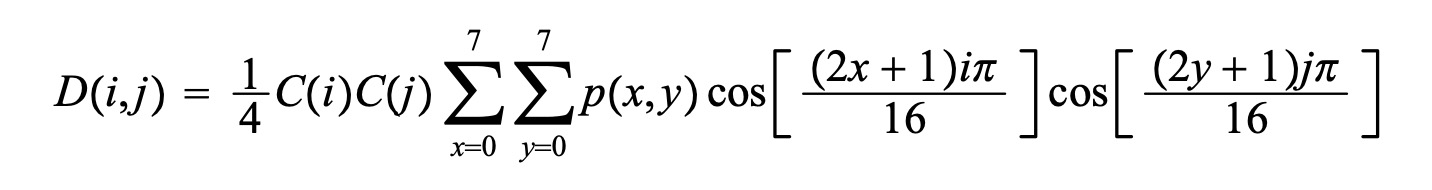

In [5]:
import cv2



def fdct_trans(block):
    """
      Perform the discrete cosine transform (DCT) on each block with pixel shift 128, [0, 255] -> [-128, 127]
    """
    block -= 128 # sub 128 
    # TODO: implement DCT here, you are not allowed to use cv2.dct or other external libraries
    raise Exception("TODO: implement fdct_trans")
    
    return dst 
    
    
blocks_dct = [[fdct_trans(block) for block in blocks[ch]] for ch in range(3)]

#blocks_dct = [[cv2.dct(block - 128)
#                   for block in blocks[ch]] for ch in range(3)]


#print("compare:",  blocks_dct[0][0], blocks_dct2[0][0])

DCT_MAT: [[ 0.3536  0.3536  0.3536  0.3536  0.3536  0.3536  0.3536  0.3536]
 [ 0.4904  0.4157  0.2778  0.0975 -0.0975 -0.2778 -0.4157 -0.4904]
 [ 0.4619  0.1913 -0.1913 -0.4619 -0.4619 -0.1913  0.1913  0.4619]
 [ 0.4157 -0.0975 -0.4904 -0.2778  0.2778  0.4904  0.0975 -0.4157]
 [ 0.3536 -0.3536 -0.3536  0.3536  0.3536 -0.3536 -0.3536  0.3536]
 [ 0.2778 -0.4904  0.0975  0.4157 -0.4157 -0.0975  0.4904 -0.2778]
 [ 0.1913 -0.4619  0.4619 -0.1913 -0.1913  0.4619 -0.4619  0.1913]
 [ 0.0975 -0.2778  0.4157 -0.4904  0.4904 -0.4157  0.2778 -0.0975]]


In [6]:
# here we print a DCT coefficient matrix
print(blocks_dct[0][0], blocks_dct[0][1])

[[-790.  -23.   -2.   -5.    6.   -2.   -5.    4.]
 [ -11.   -4.   -1.    6.   -9.    5.   10.    3.]
 [ -25.   -2.   -6.    9.   -3.   -3.   -0.    1.]
 [   4.    0.   18.  -24.   -5.  -11.   -7.   -5.]
 [   4.   -3.    9.   -4.    5.   -3.    5.    4.]
 [  -3.    2.   -3.   -1.   -1.   13.   -1.    2.]
 [   0.    6.    4.    3.   -8.   -5.   -1.   -2.]
 [  -0.   -5.   -1.   -1.    7.    0.   -0.   -2.]] [[-815.   -2.    0.    5.    4.  -12.    2.    4.]
 [   6.  -16.   -5.    3.   -1.    3.   -2.    0.]
 [  -4.  -21.   -1.   -3.   -7.    5.   -3.    3.]
 [ -24.    9.   -1.  -19.   14.   -7.    6.    6.]
 [   6.   15.   16.   11.    4.    1.   -2.   -8.]
 [  -2.   -6.    3.   -8.   -2.    7.   -5.    2.]
 [  -3.    2.   -2.   -1.    4.    0.   -2.   -1.]
 [   1.   -1.    0.    0.   -1.    1.   -2.   -0.]]


# step 3 -- Quantization of DCT coefficients 

In [7]:


# standard Quantization Tables (quality=50) for Luminance & Chrominance
QY = np.array([[16,11,10,16,24,40,51,61],
               [12,12,14,19,26,48,60,55],
               [14,13,16,24,40,57,69,56],
               [14,17,22,29,51,87,80,62],
               [18,22,37,56,68,109,103,77],
               [24,35,55,64,81,104,113,92],
               [49,64,78,87,103,121,120,101],
               [72,92,95,98,112,100,103,99]])

QC = np.array([[17,18,24,47,99,99,99,99],
               [18,21,26,66,99,99,99,99],
               [24,26,56,99,99,99,99,99],
               [47,66,99,99,99,99,99,99],
               [99,99,99,99,99,99,99,99],
               [99,99,99,99,99,99,99,99],
               [99,99,99,99,99,99,99,99],
               [99,99,99,99,99,99,99,99]])

def get_quant_table(qtable, quality):
    # e.g., quality = 50
    if quality < 50 and quality >= 1:
        scale = 5000 // quality
    elif quality <= 100:
        scale = 200 - 2*quality
    else:
        print("Quality Factor must be in the range [1..99]")
    
    Qt = (qtable * scale + 50) // 100
    Qt[Qt <= 0] = 1 # Prevent divide by 0 error
    Qt[Qt > 32767] = 32767 # 12-bit
    Qt[Qt > 255] = 255
    
    return Qt

# quantization table
Qt =[get_quant_table(QY, QUALITY), 
     get_quant_table(QC, QUALITY), 
     get_quant_table(QC, QUALITY)]
print(Qt)


# do quantization 
blocks_quantized = [(e / Qt[ch]).round().astype(np.int32) for ch, e in enumerate(blocks_dct)]

print("quantized coeff ", blocks_quantized[0][:3])

[array([[ 16,  11,  10,  16,  24,  40,  51,  61],
       [ 12,  12,  14,  19,  26,  48,  60,  55],
       [ 14,  13,  16,  24,  40,  57,  69,  56],
       [ 14,  17,  22,  29,  51,  87,  80,  62],
       [ 18,  22,  37,  56,  68, 109, 103,  77],
       [ 24,  35,  55,  64,  81, 104, 113,  92],
       [ 49,  64,  78,  87, 103, 121, 120, 101],
       [ 72,  92,  95,  98, 112, 100, 103,  99]]), array([[17, 18, 24, 47, 99, 99, 99, 99],
       [18, 21, 26, 66, 99, 99, 99, 99],
       [24, 26, 56, 99, 99, 99, 99, 99],
       [47, 66, 99, 99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99, 99, 99, 99]]), array([[17, 18, 24, 47, 99, 99, 99, 99],
       [18, 21, 26, 66, 99, 99, 99, 99],
       [24, 26, 56, 99, 99, 99, 99, 99],
       [47, 66, 99, 99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99, 9

# step 4 -- Entropy coding 

Entropy coding is a special form of lossless data compression. 
It involves arranging the image components in a "zigzag" order 
employing run-length encoding (RLE) algorithm that groups similar frequencies together, 
inserting length coding zeros, and then using Huffman coding on what is left.

![zigzag](https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/JPEG_ZigZag.svg/440px-JPEG_ZigZag.svg.png)

Why zigzag ? -- to group low frequency coefficients in top of vector and high frequency coefficients at the bottom

In [8]:
print(blocks_quantized[0][0])

[[-49  -2   0   0   0   0   0   0]
 [ -1   0   0   0   0   0   0   0]
 [ -2   0   0   0   0   0   0   0]
 [  0   0   1  -1   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [9]:
def zigzag_scan(block, bsize):
    # Create the zigzag order
    zigzag = sorted(((x, y) for x in range(bsize) for y in range(bsize)), 
                    key=lambda x: (x[0]+x[1], -x[1] if (x[0]+x[1]) % 2 else x[1]))
    # Perform the zigzag scan
    return [block[x][y] for x, y in zigzag]

    
print("zigzag order of blocks_quantized[0][0]:", zigzag_scan(blocks_quantized[0][0], 8))


zigzag order of blocks_quantized[0][0]: [-49, -2, -1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
coeff_zigzag = [np.stack([zigzag_scan(e[i], 8) for i in range(e.shape[0])]) 
                for ch, e in enumerate(blocks_quantized)]

print("coeff_zigzag's shape of each channel:", 
      coeff_zigzag[0].shape, 
      coeff_zigzag[1].shape,
      coeff_zigzag[2].shape)

coeff_zigzag's shape of each channel: (375000, 64) (375000, 64) (375000, 64)


## DPCM (Differential Pulse Code modulation)  for DC coefficients
e.g., 10 11 12 13 10 9 -> 10 1  2  3  0 -1

we will use DPCM to encode the DC coefficients, this is due to the DC component value in each 8x8 block is large and varies across blocks, but is often close to that in the previous block.

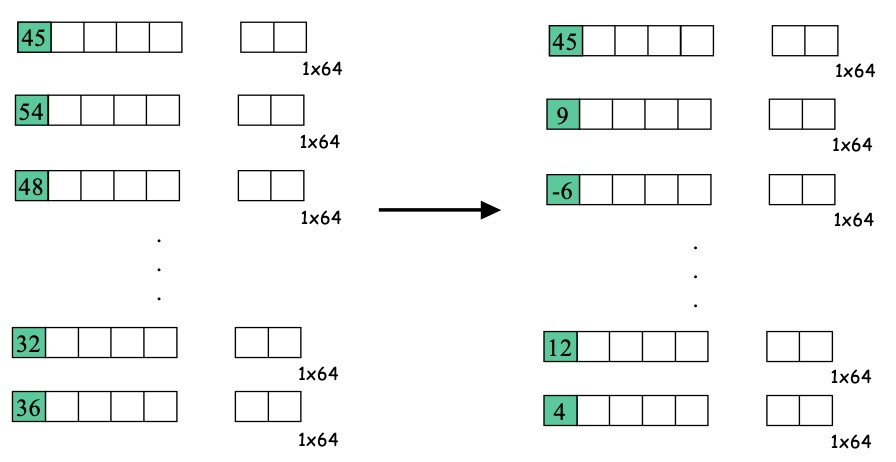

## Run-length coding for AC components
e.g. 10 10 10 10 10 10 10 -> 7 10

## Huffman coding

The DC & AC coefficients are encoded (borrow from cpp code)

In [11]:
huffman_coder = HuffmanCodec()


data_len = huffman_coder.encode(coeff_zigzag[0], coeff_zigzag[1], coeff_zigzag[2],
                                W, H, COLOR_FORMAT)

print("JPEG encoded data length:", data_len, data_len/1024, "kB")
print("Compression ratio:",  H*W*C/data_len)

JPEG encoded data length: 2131591 2081.6318359375 kB
Compression ratio: 33.777586788459885


In [12]:
encoded_img = huffman_coder.getResult(data_len)
print(len(encoded_img), encoded_img.dtype)

2131591 int8


In [13]:
STD_HUFTAB_LUMIN_AC = [
        0x00, 0x02, 0x01, 0x03, 0x03, 0x02, 0x04, 0x03, 0x05, 0x05, 0x04, 0x04, 0x00, 0x00, 0x01, 0x7d,
        0x01, 0x02, 0x03, 0x00, 0x04, 0x11, 0x05, 0x12, 0x21, 0x31, 0x41, 0x06, 0x13, 0x51, 0x61, 0x07,
        0x22, 0x71, 0x14, 0x32, 0x81, 0x91, 0xa1, 0x08, 0x23, 0x42, 0xb1, 0xc1, 0x15, 0x52, 0xd1, 0xf0,
        0x24, 0x33, 0x62, 0x72, 0x82, 0x09, 0x0a, 0x16, 0x17, 0x18, 0x19, 0x1a, 0x25, 0x26, 0x27, 0x28,
        0x29, 0x2a, 0x34, 0x35, 0x36, 0x37, 0x38, 0x39, 0x3a, 0x43, 0x44, 0x45, 0x46, 0x47, 0x48, 0x49,
        0x4a, 0x53, 0x54, 0x55, 0x56, 0x57, 0x58, 0x59, 0x5a, 0x63, 0x64, 0x65, 0x66, 0x67, 0x68, 0x69,
        0x6a, 0x73, 0x74, 0x75, 0x76, 0x77, 0x78, 0x79, 0x7a, 0x83, 0x84, 0x85, 0x86, 0x87, 0x88, 0x89,
        0x8a, 0x92, 0x93, 0x94, 0x95, 0x96, 0x97, 0x98, 0x99, 0x9a, 0xa2, 0xa3, 0xa4, 0xa5, 0xa6, 0xa7,
        0xa8, 0xa9, 0xaa, 0xb2, 0xb3, 0xb4, 0xb5, 0xb6, 0xb7, 0xb8, 0xb9, 0xba, 0xc2, 0xc3, 0xc4, 0xc5,
        0xc6, 0xc7, 0xc8, 0xc9, 0xca, 0xd2, 0xd3, 0xd4, 0xd5, 0xd6, 0xd7, 0xd8, 0xd9, 0xda, 0xe1, 0xe2,
        0xe3, 0xe4, 0xe5, 0xe6, 0xe7, 0xe8, 0xe9, 0xea, 0xf1, 0xf2, 0xf3, 0xf4, 0xf5, 0xf6, 0xf7, 0xf8,
        0xf9, 0xfa,
]
STD_HUFTAB_LUMIN_DC = [
        0x00, 0x01, 0x05, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00,
        0x00, 0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0a, 0x0b,
]
STD_HUFTAB_CHROM_AC = [
        0x00, 0x02, 0x01, 0x02, 0x04, 0x04, 0x03, 0x04, 0x07, 0x05, 0x04, 0x04, 0x00, 0x01, 0x02, 0x77,
        0x00, 0x01, 0x02, 0x03, 0x11, 0x04, 0x05, 0x21, 0x31, 0x06, 0x12, 0x41, 0x51, 0x07, 0x61, 0x71,
        0x13, 0x22, 0x32, 0x81, 0x08, 0x14, 0x42, 0x91, 0xa1, 0xb1, 0xc1, 0x09, 0x23, 0x33, 0x52, 0xf0,
        0x15, 0x62, 0x72, 0xd1, 0x0a, 0x16, 0x24, 0x34, 0xe1, 0x25, 0xf1, 0x17, 0x18, 0x19, 0x1a, 0x26,
        0x27, 0x28, 0x29, 0x2a, 0x35, 0x36, 0x37, 0x38, 0x39, 0x3a, 0x43, 0x44, 0x45, 0x46, 0x47, 0x48,
        0x49, 0x4a, 0x53, 0x54, 0x55, 0x56, 0x57, 0x58, 0x59, 0x5a, 0x63, 0x64, 0x65, 0x66, 0x67, 0x68,
        0x69, 0x6a, 0x73, 0x74, 0x75, 0x76, 0x77, 0x78, 0x79, 0x7a, 0x82, 0x83, 0x84, 0x85, 0x86, 0x87,
        0x88, 0x89, 0x8a, 0x92, 0x93, 0x94, 0x95, 0x96, 0x97, 0x98, 0x99, 0x9a, 0xa2, 0xa3, 0xa4, 0xa5,
        0xa6, 0xa7, 0xa8, 0xa9, 0xaa, 0xb2, 0xb3, 0xb4, 0xb5, 0xb6, 0xb7, 0xb8, 0xb9, 0xba, 0xc2, 0xc3,
        0xc4, 0xc5, 0xc6, 0xc7, 0xc8, 0xc9, 0xca, 0xd2, 0xd3, 0xd4, 0xd5, 0xd6, 0xd7, 0xd8, 0xd9, 0xda,
        0xe2, 0xe3, 0xe4, 0xe5, 0xe6, 0xe7, 0xe8, 0xe9, 0xea, 0xf2, 0xf3, 0xf4, 0xf5, 0xf6, 0xf7, 0xf8,
        0xf9, 0xfa
]

STD_HUFTAB_CHROM_DC = [
        0x00, 0x03, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x00, 0x00, 0x00, 0x00, 0x00,
        0x00, 0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0a, 0x0b,
]

In [14]:
# write to .jpg file
huf_ac_tab = [STD_HUFTAB_LUMIN_AC, STD_HUFTAB_CHROM_AC]
huf_dc_tab = [STD_HUFTAB_LUMIN_DC, STD_HUFTAB_CHROM_DC]


JpegIO.writeToFile(OUTPUT_NAME, encoded_img,  
                   [Qt[0].flatten().tolist(), Qt[1].flatten().tolist()], 
                   huf_ac_tab, huf_dc_tab, 
                   W, H, COLOR_FORMAT)

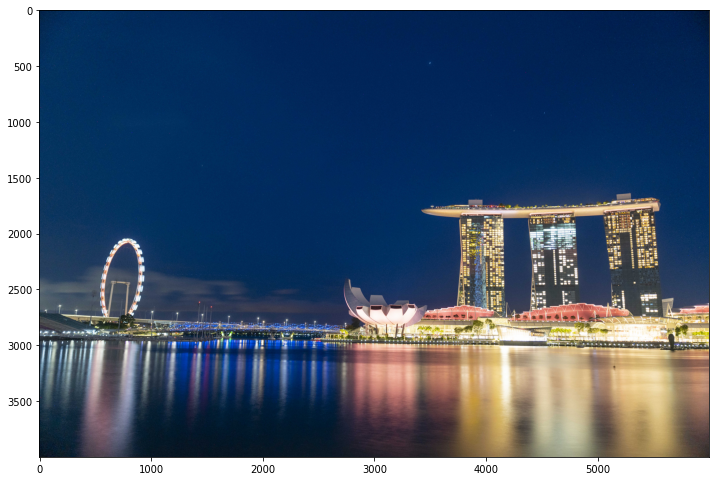

In [15]:
jpg_img = read_rgb_image(OUTPUT_NAME)

plt.figure(figsize=(12, 12)) 
plt.imshow(jpg_img)